## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/7t/hjjdw6tn691f1ss92dbclmp00000gn/T/ipykernel_17014/2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('ProgrammingLanguageData.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [19]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,javascript,163
2,2008-08-01 00:00:00,perl,28
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,delphi,13


In [18]:
df.tail()

,DATE,TAG,POSTS
2602,2024-03-01 00:00:00,perl,52
2603,2024-03-01 00:00:00,python,8419
2604,2024-03-01 00:00:00,c,797
2605,2024-03-01 00:00:00,javascript,5336
2606,2024-03-01 00:00:00,swift,814


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [20]:
df.shape

(2607, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [25]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,188,188
c,188,188
c#,189,189
c++,188,188
delphi,188,188
go,173,173
java,188,188
javascript,188,188
perl,188,188


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
df.groupby('TAG').sum(numeric_only=True).sort_values(by='POSTS',ascending=False)

,POSTS
TAG,
javascript,2527095
python,2189582
java,1916133
c#,1614222
php,1463888
c++,806193
r,505145
c,403716
swift,333197


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [36]:
df.groupby('TAG').count().sort_values(by='DATE')

,DATE,POSTS
TAG,,
go,173,173
swift,179,179
r,186,186
assembly,188,188
c,188,188
c++,188,188
delphi,188,188
java,188,188
javascript,188,188


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [15]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,javascript,163
2,2008-08-01,perl,28
3,2008-08-01,c#,504
4,2008-08-01,delphi,13


## Data Manipulation



In [16]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
pivoted_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,172.0,958.0,3105.0,1466.0,103.0,408.0,3273.0,5183.0,44.0,1397.0,8450.0,1991.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1428.0,75.0,326.0,2536.0,4762.0,53.0,1207.0,6993.0,1602.0,154.0,740.0
2024-01-01,176.0,825.0,2685.0,1579.0,89.0,345.0,2864.0,5128.0,34.0,1400.0,7756.0,1807.0,163.0,867.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [48]:
pivoted_df.shape

(189, 14)

In [50]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [49]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [51]:
pivoted_df.count()

TAG
assembly      188
c             188
c#            189
c++           188
delphi        188
go            173
java          188
javascript    188
perl          188
php           188
python        188
r             186
ruby          188
swift         179
dtype: int64

In [17]:
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


In [53]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

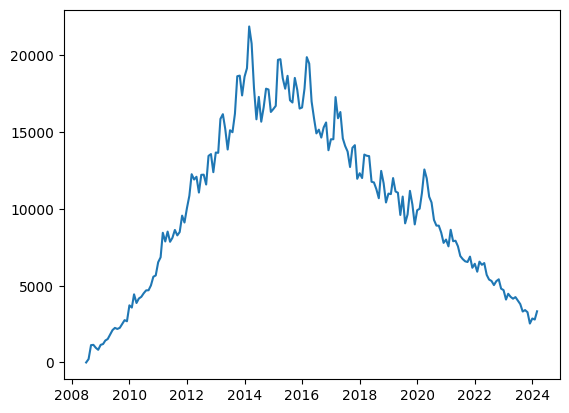

In [23]:
plt.plot(pivoted_df.index, pivoted_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

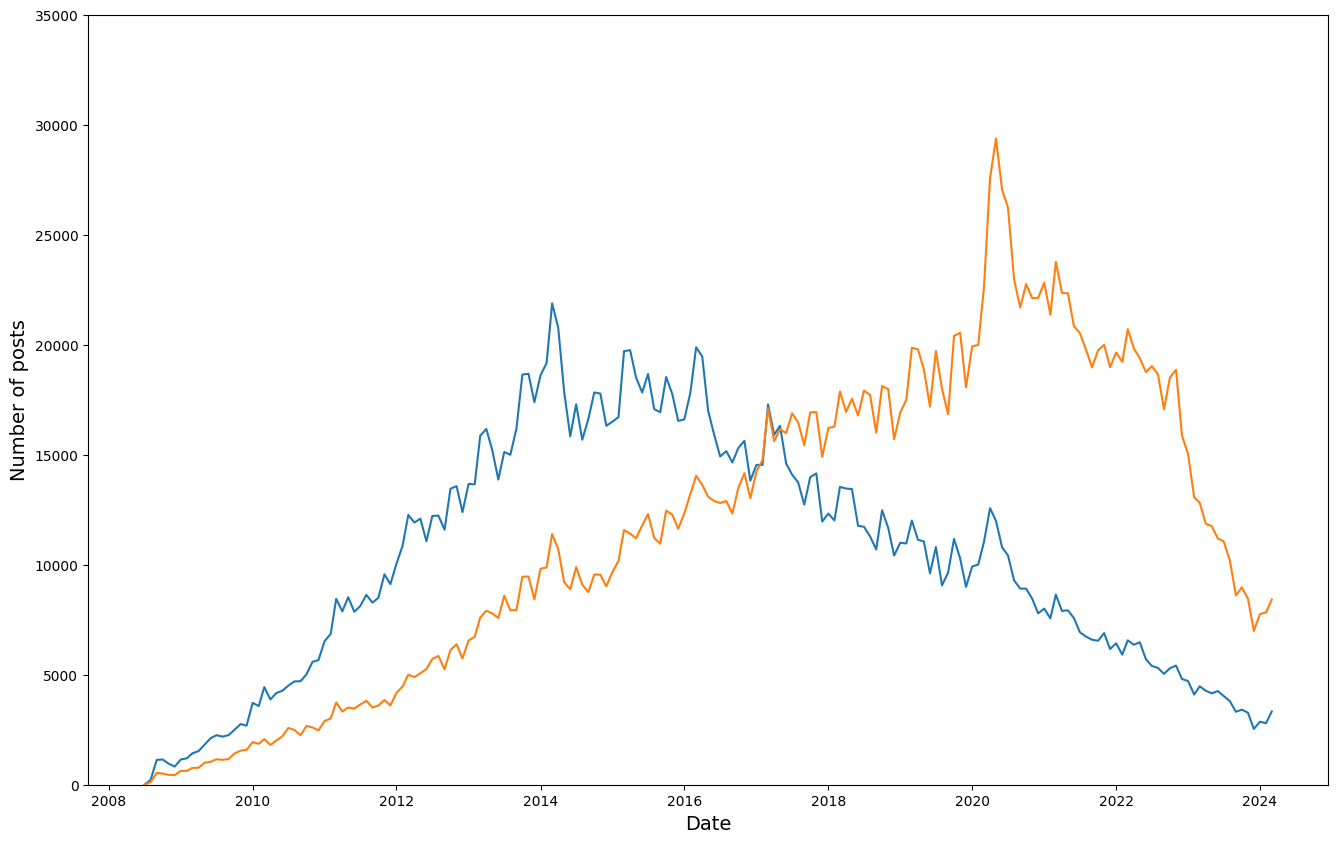

In [24]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts',fontsize=14)
plt.ylim(0,35000)
plt.plot(pivoted_df.index, pivoted_df.java)
plt.plot(pivoted_df.index, pivoted_df.python)

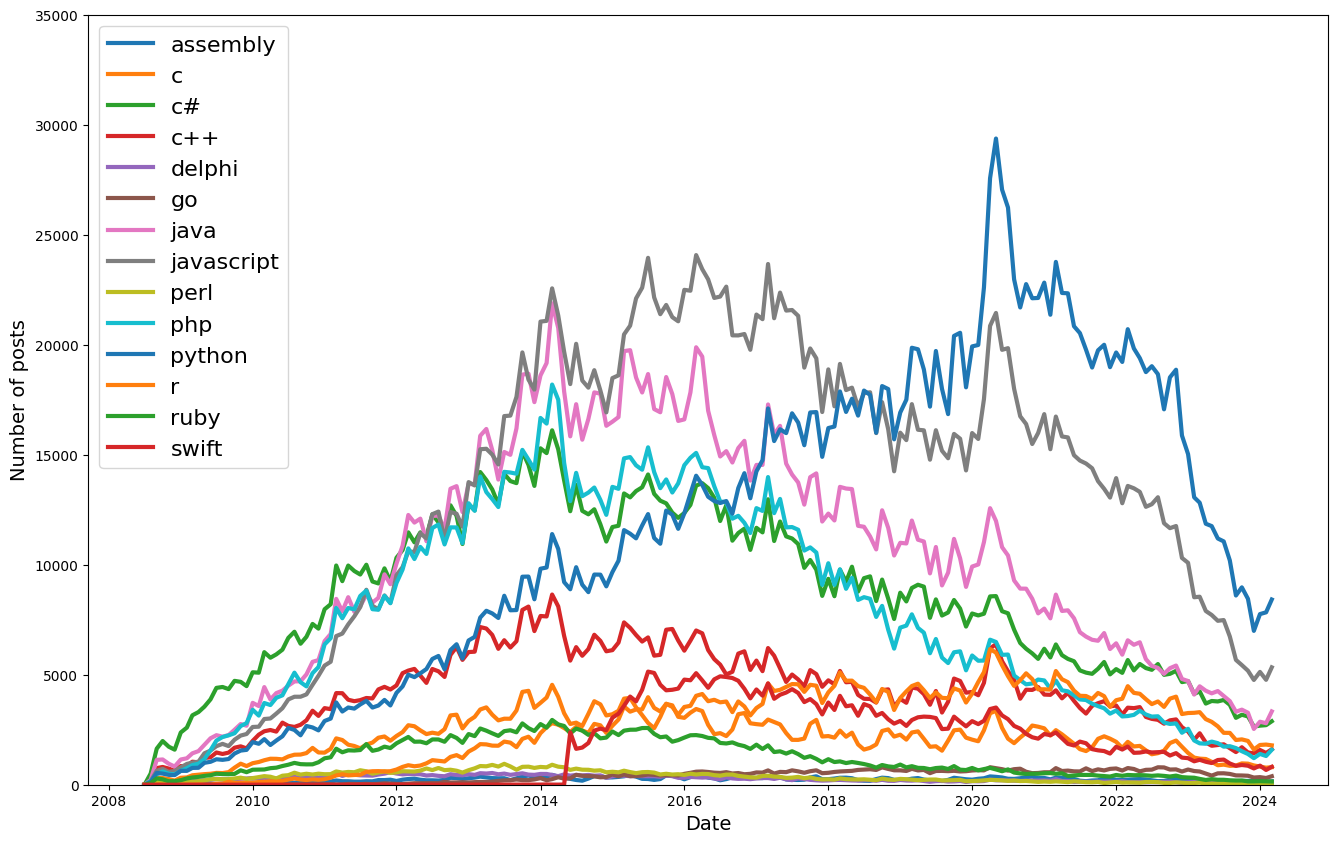

In [25]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts',fontsize=14)
plt.ylim(0,35000)
for column in pivoted_df.columns:
  plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

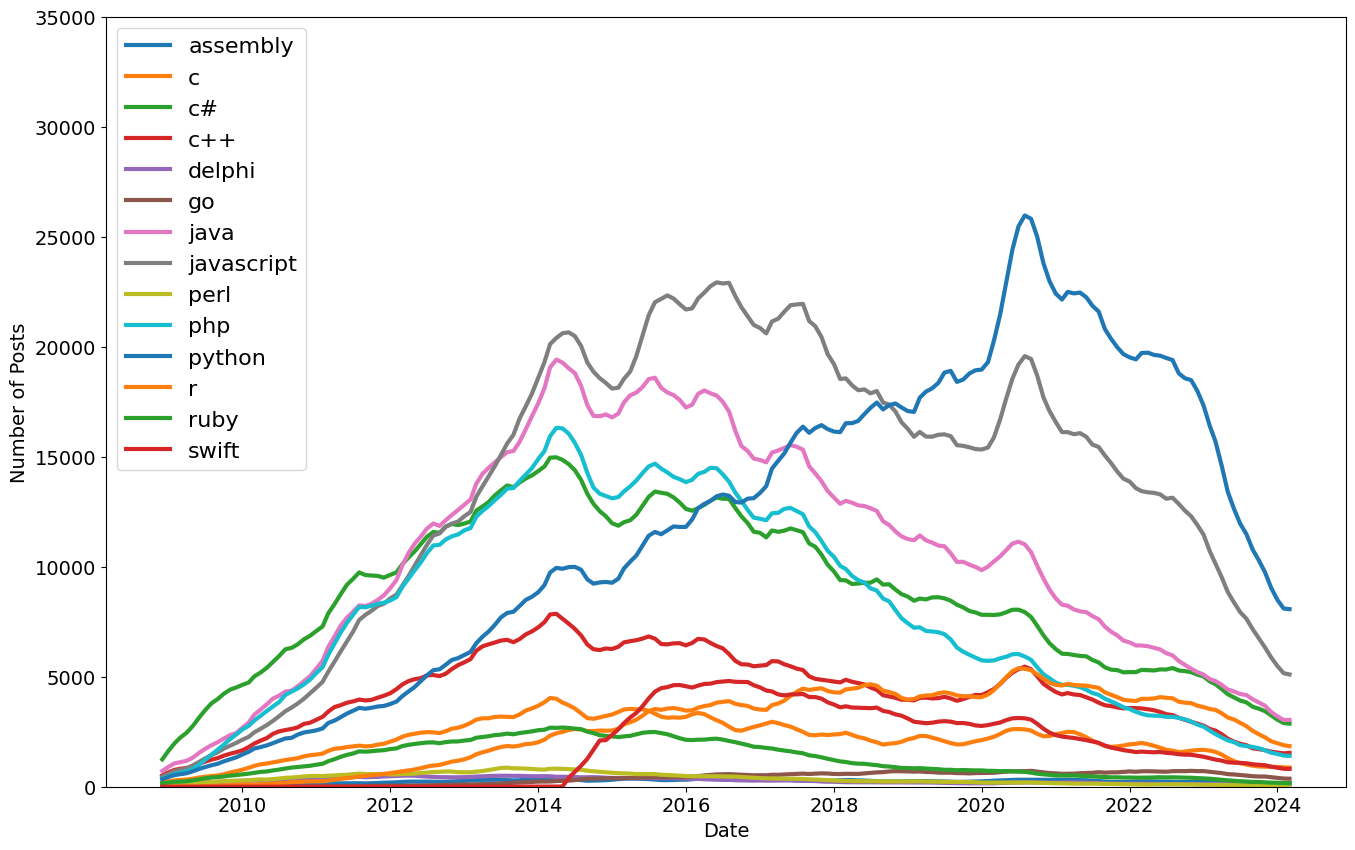

In [30]:
roll_df = pivoted_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

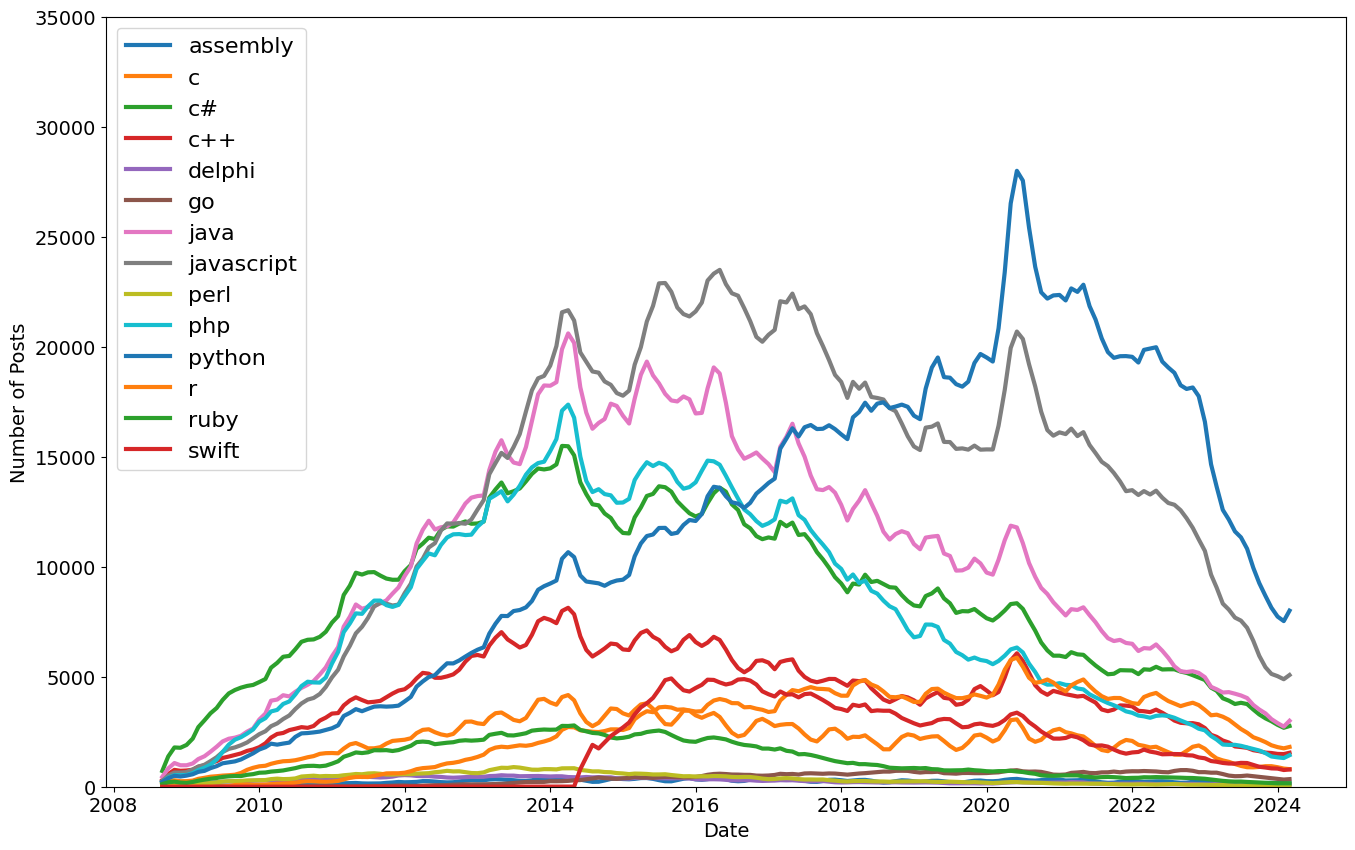

In [31]:
roll_df = pivoted_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

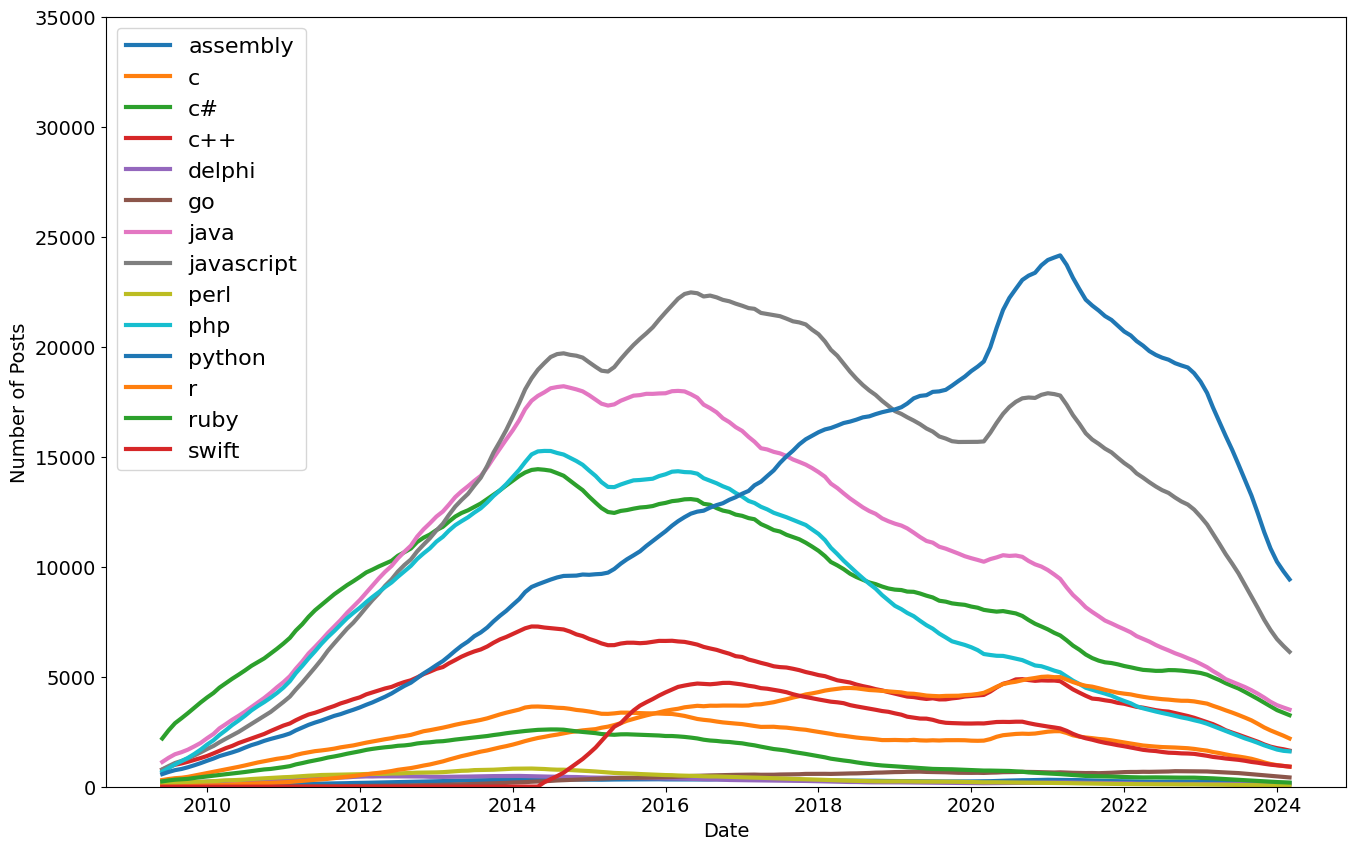

In [32]:
roll_df = pivoted_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)